# Graphs
A general structure that is used to implement road networks, flight paths, web page links across the internet, etc.


Random Notes:
* A tree is type of graph
* Web crawling is a graph traversal

### Two well-known graph implementations:
__Adjacency Matrix__
* One of the easiest implementation (2-D matrix)
* Each of the rows & columns represent a vertex
* Tradeoff: A lot of the cells in a matrix can be left empty which isn't really space efficient
* Great for when there are a lot of vertices and edges
* For undirected graphs, adjaceny matrices will have symmetry along a diagonal
* Maximum grid size of an adjacency matrix is the square of the total number of vertices, *V* --> __*V* ²__

__Adjacency List__
* More space efficient than the adjaceny matrix
* A master list of all the vertices where each vertex stores info about what the other vertices are connected to
* Using Python dictionaries

Example of an Adjaceny Matrix:

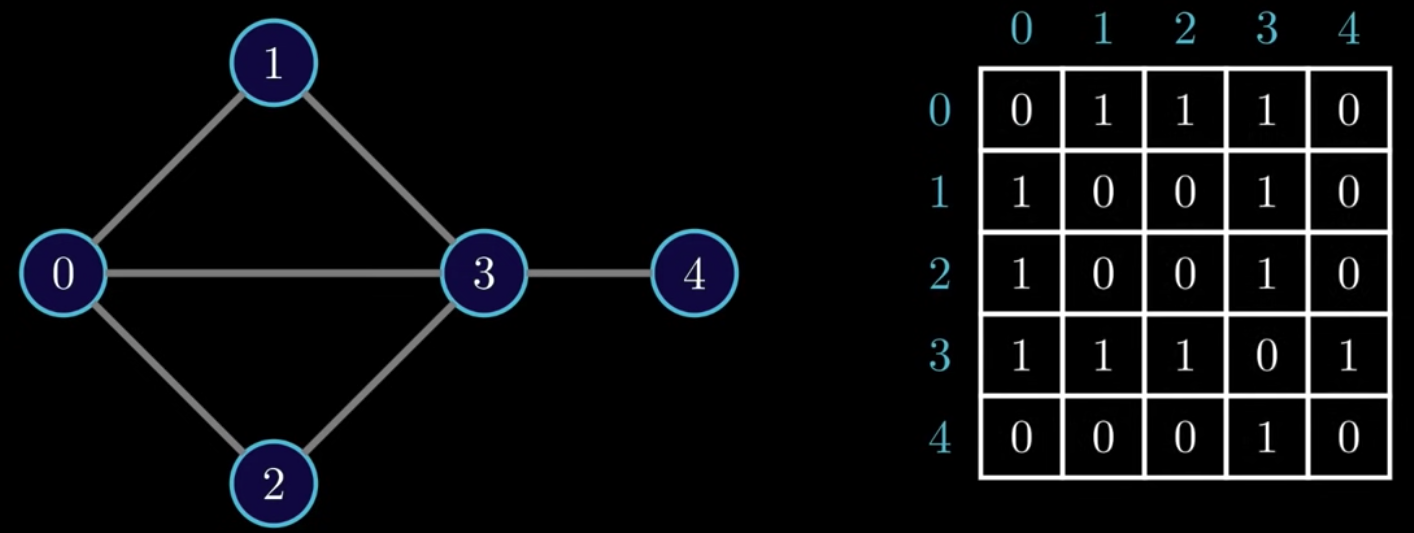

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/graph-adjaceny-matrix.png", width=500)

Example of an Adjacency List:

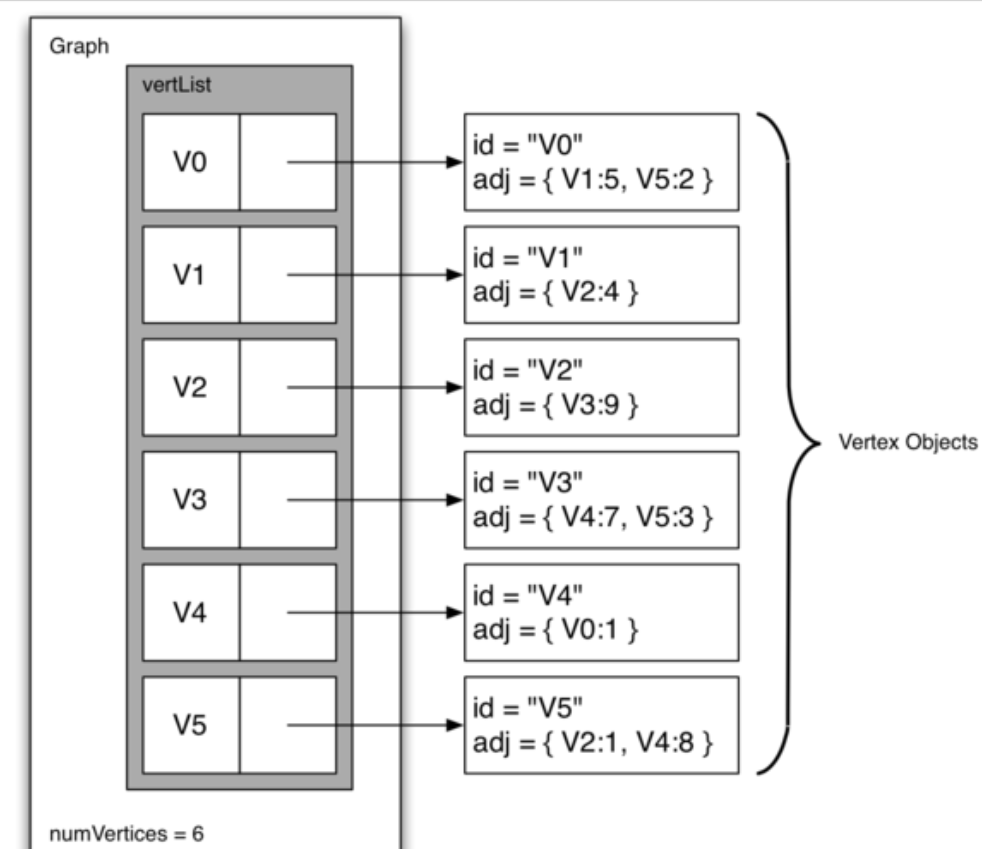

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/graph-adjaceny-list.png", width=400)

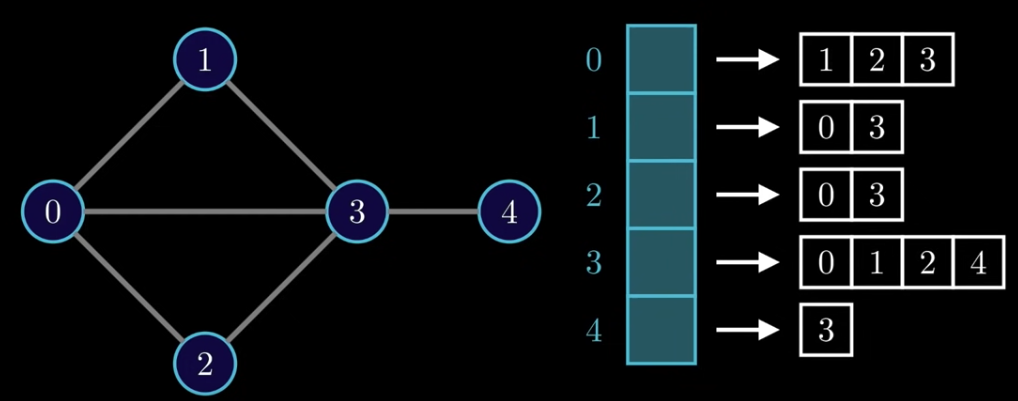

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/graph-adjaceny-list2.png", width=600)

### Vocabulary

__Vertex__: Another name for a node on a graph

__Edge__: connection between two vertices/nodes; edges can be bi-directional (2) or uni-directional (1)

__Directed Graph (Digraph)__: When all the edges are uni-directional (see screenshot below for directed graph)

__Undirected Graph__: When all the edges between two vertices are bi-directional

__Self Loop__: When a node's outgoing edge points back to itself
* e.g. when a webpage links back to itself

__Multiedge or Parallel Edges__: When a node has multiple edges instead of one
* e.g. multiple different flight paths from the same airport
* Graphs without these kinds of edges are called "simple graphs"
    
__Path / "Walk"__: Sequence of vertices that are connected by edges
* __*Simple Path*__: a path where no vertices AND no edges are visited more than once
* __*Trail Path*__: a path where vertices can be visted more than once but edges cannot be visited more than once
* __*Closed Path*__: where graph start and end at the same node & length of path is > 0
* __*Simple Cycle (Closed Path)*__: In a closed walk, there is no repeated visits of the same node/edge other than the start/end node
* __*Unweighted Path Length*__: just the number of edges in the path; (N-1) where N is the number of vertices/nodes
* __*Weighted Path Length*__: the sum of the edge weights along a path


__Acyclic Graph__: A graph that doesn't allow for a Simple Cycle as stated above

<br>

__Formal Mathematical Notation of a Graph__: A graph *G* is an ordered pair consisting of a set of vertices (*V*) and edges (*E*) --> *G* = (*V*, *E*)
* Directed Graph --> (a, b) != (b, a)
* Undirected Graph --> {a, b} == {b. a}
* Vertices in a graph can be represented by a set: V = {V1, V2, V3, V4, ...}
    * Number of vertices in a graph --> absolute value of set V
* Edges can be represeted by an ordered/unordered pair of its two vertices/nodes: E = { {V1, V2}, {V2, V4}, {V3, V5}, ... }
    * Number of edges in a graph --> absolute value of set E
        * NOTE: Max number of edges in a non-multiedge, __*undirected graph*__ is N-1, where N is the number of nodes
        * NOTE: Max number of edges in a non-multiedge, __*directed graph*__ is (N-1)/2


<br>

__Dense Graph__: When the # of edges is close to the max number of edges the graph can have
* Use an __*adjacency matrix*__

__Sparse Graph__: When the # of edges is very low compared to the max number of edges the graph can have
* Use an __*adjacency list*__


Example of a directed (one-way edges) graph:

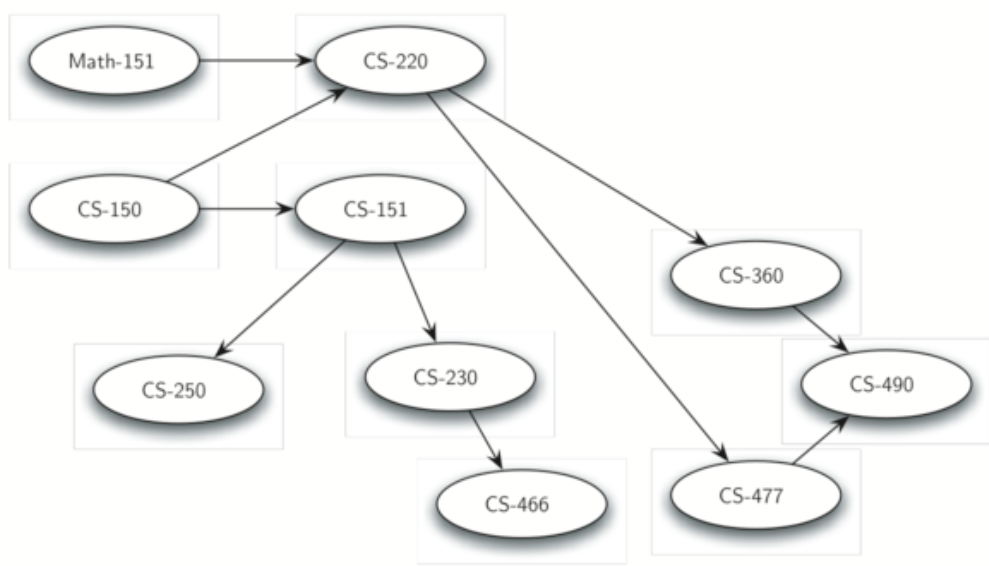

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/directed-graph.png", width=500)

Example of a self loop (inter-linked webpages on the internet):

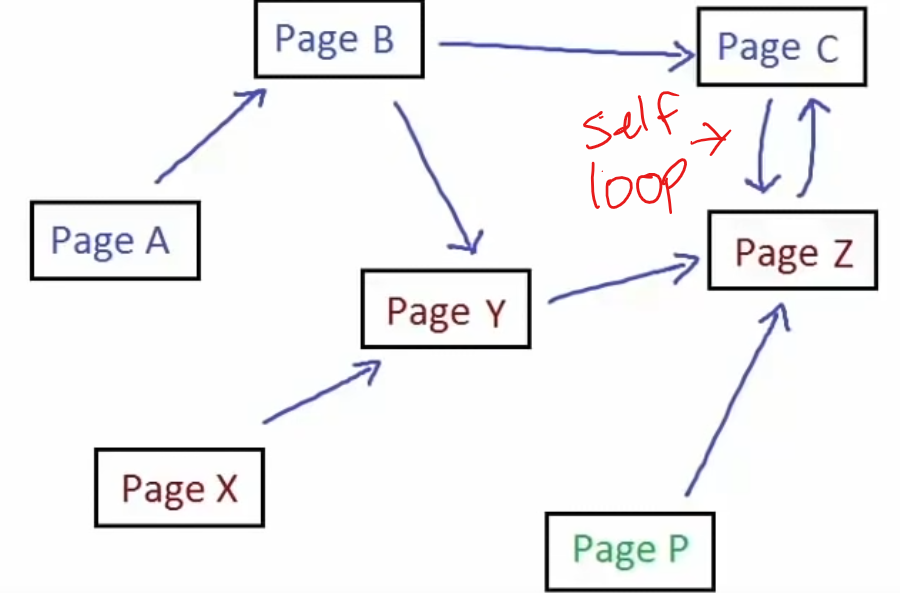

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/graph-self-loop.png", width=500)

Undirected vs Directed Acyclic Graph:

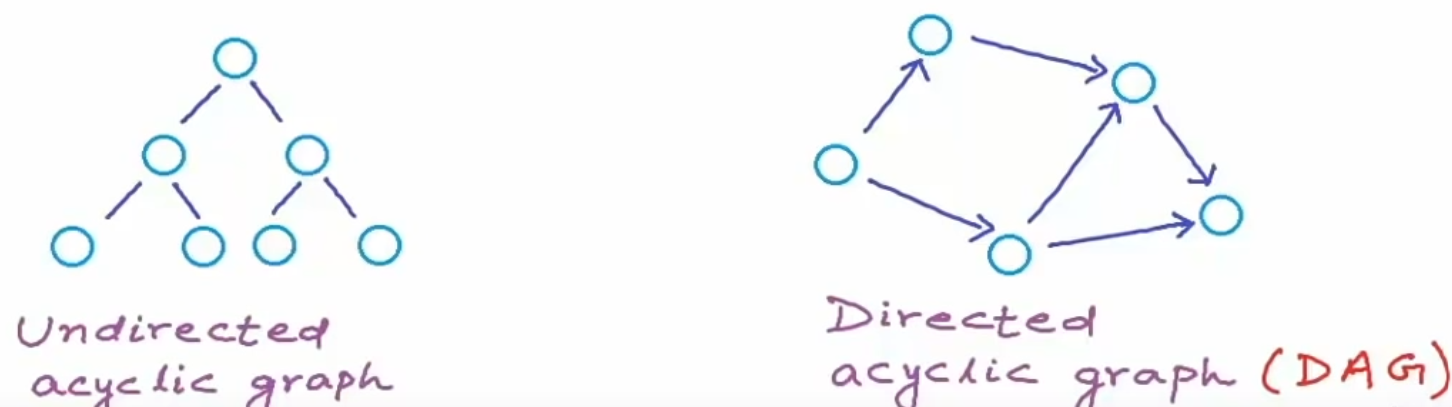

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/graph-acyclic.png", width=600)

<hr>
<hr>

### Implementation 1: Adjacency List

In [34]:
class Vertex:
    def __init__(self, data):
        self.data = data
        self.connections = {} # key/val pairs of other vertex objects that are connected to current vertex object & the edge weight


    ## Retrieve all connections for current Vertex object
    def get_connections(self):
        return str([connection.data for connection in self.connections])


    ## If current vertex is connected to another vertex, retrieve the weight of the edge connecting the two vertices
    def get_connection_weight(self, connectingVertex):
        # if connectingVertex exists, return the assigned weight, otherwise return None if connectingVertex doesn't exist
        return self.connections.get(connectingVertex, None) 


    ## Connect another vertex to the current Vertex & set custom neighbor edge weight; Default neighbor edge weight of 0
    def set_connection(self, connectingVertex, weight = 0):
        self.connections[connectingVertex] = weight

    
    ## String representation of current Vertex object
    def __repr__(self):
        return f"Vertex({self.data})"

    ## String representation of current Vertex's connections
    def __str__(self):
        return "Vertex " + str(self.data) + " is connected to the following vertices: " + self.get_connections()

In [36]:
class Graph:
    def __init__(self):
        self.vertices = {}


    ## Add new vertices to graph
    def add_vertex(self, data):
        self.vertices[data] = Vertex(data)


    ## Retrieve Vertex object if exists in current Graph object, otherwise return None
    def get_vertex(self, data):
        return self.vertices.get(data, None)


    ## Connect two vertices with an edge & an optional custom weight; Default edge weight is 0
    def connect_vertices(self, from_vertex, to_vertex, weight = 0):
       
        # If from_vertex doesn't exist in current Graph object:
        if from_vertex not in self.vertices:
            self.add_vertex(from_vertex)

        # If to_vertex doesn't exist in current Graph object:
        if to_vertex not in self.vertices:
            self.add_vertex(to_vertex)

        # If both from_vertex and to_vertex do exist in current Graph object:
        self.vertices[from_vertex].set_connection(self.vertices[to_vertex], weight)

    
    ## Retrieve all of the vertices in the current Graph object
    def get_vertices(self):
        return self.vertices.keys()


    ## String representation of current Graph object
    def __repr__(self):
        vertices = []

        for vertex in self.vertices.values():
            result = f"{vertex.data}: {vertex.get_connections()}"

            vertices.append(result)

        return "\n".join(vertices)


In [8]:
g = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['D'],
    'D': ['E', 'A'],
    'E': []
}

print([g.keys()])

[dict_keys(['A', 'B', 'C', 'D', 'E'])]


`graph1` object visual example:

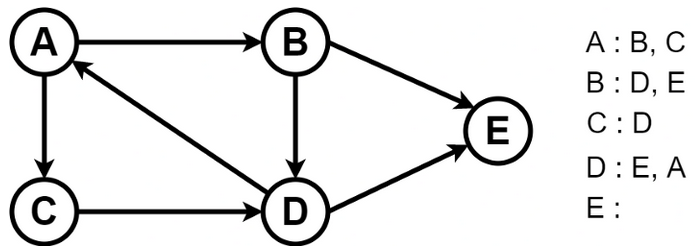

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename="aa_Screenshots/graph1-implementation-example.png", width=400)

In [56]:
graph1 = Graph()

graph1.add_vertex("A")
graph1.add_vertex("B")
graph1.add_vertex("C")
graph1.add_vertex("D")
graph1.add_vertex("E")


graph1.connect_vertices("A", "B")
graph1.connect_vertices("A", "C", 5) # testing custom weight
graph1.connect_vertices("B", "D")
graph1.connect_vertices("B", "E")
graph1.connect_vertices("C", "D")
graph1.connect_vertices("D", "E")
graph1.connect_vertices("D", "A")

In [57]:
graph1

A: ['B', 'C']
B: ['D', 'E']
C: ['D']
D: ['E', 'A']
E: []

In [58]:
graph1.get_vertices()

dict_keys(['A', 'B', 'C', 'D', 'E'])

In [59]:
vertexA = graph1.get_vertex("A")

vertexA

Vertex(A)

In [60]:
vertexB = graph1.get_vertex("B")

vertexB

Vertex(B)

In [61]:
vertexA.__str__()

"Vertex A is connected to the following vertices: ['B', 'C']"

In [62]:
vertexB.__str__()

"Vertex B is connected to the following vertices: ['D', 'E']"

In [63]:
print(vertexA.get_connection_weight(vertexB))

0


In [64]:
vertexC = graph1.get_vertex("C")

In [65]:
print(vertexA.get_connection_weight(vertexC))

5
